In [1]:
import os
import requests
from pprint import pprint
import json
from datetime import datetime,time, timedelta
import glob
import time
import pandas as pd
import logging
import urllib.request
import logging
import logging.handlers
import boto3
import botocore
import botocore.session
import plotly as py

In [112]:
import logging
import logging.handlers

logger=logging.getLogger(__name__)
logger.setLevel(logging.INFO)

logfile1 = time.strftime("%Y-%m-%d_%H_%M_%S"+".log")
print (logfile1)
handler= logging.FileHandler(logfile1)
handler.setLevel(logging.INFO)

formatter= logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.info('hello ')

2017-07-07_23_09_27.log


In [113]:
logger.info('Reading Json')
with open('intial_config.json') as data_file:    
    data = json.load(data_file)


In [114]:
import boto3
s3 = boto3.resource(
    's3',
    aws_access_key_id=data["AWSAccess"],
    aws_secret_access_key=data["AWSSecret"])

client= boto3.client('s3', 
                     aws_access_key_id=data["AWSAccess"],
                    aws_secret_access_key=data["AWSSecret"])

In [115]:
names=[]
response = client.list_buckets()
for bucket in response["Buckets"]:
    names.append(bucket)

Bucketname= 'adsassign2_databucket1'
if Bucketname in names:
    print('it exists')
else:
    s3.create_bucket(Bucket=Bucketname)  

In [123]:
uploadFileNames = []

for filename in glob.glob("Clean_Data.csv"):
    uploadFileNames.append(filename)
    print(filename)

Clean_Data.csv


In [124]:
import botocore.session
for files in uploadFileNames:
    try:
        s3.Object('adsassign2_databucket1', files).load()
    except botocore.exceptions.ClientError as e:
        if e.response['Error']['Code'] == "404":
            s3.Object("adsassign1_databucket", files).put(Body=open(files, 'rb'))
            print(files+' uploaded')
            
        else:
            raise
    else:
        exists = True

    print(files+''+' exists')
        

Clean_Data.csv uploaded
Clean_Data.csv exists


In [2]:
a= pd.read_csv('properties_2016.csv')

C:\Users\AkilP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
a.shape

(2985217, 58)

In [4]:
b= pd.read_csv('train_2016.csv')

In [5]:
b.shape

(90275, 3)

In [95]:
df= pd.merge(b,a, on='parcelid', how='left')

In [96]:
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [8]:
df.shape

(90275, 60)

In [9]:
df['transactiondate']=pd.to_datetime(df['transactiondate'])

In [10]:
df['MONTH'] = pd.to_datetime(df['transactiondate']).dt.month
df['YEAR']  =   pd.to_datetime(df['transactiondate']).dt.year


In [11]:
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,MONTH,YEAR
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,1,2016
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN,1,2016
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,1,2016
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13,1,2016
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13,1,2016


### Single Variable Analysis

In [12]:
monthly= df.groupby(['MONTH'])['YEAR'].count()

In [13]:
monthly1= pd.DataFrame(monthly).reset_index()

In [14]:
import calendar
monthly1['MONTH'] = monthly1['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [91]:
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF

In [83]:
import plotly 
plotly.tools.set_credentials_file(username='dhruvkanakia', api_key='qHQ6b8DwjCTt3UUxTxfc')


In [24]:

trace = go.Scatter(x = monthly1['MONTH'], y = monthly1['YEAR'],
                  name='Number of Transactions')
layout = go.Layout(title='Number of Transactions over each month',
                   plot_bgcolor='rgb(180, 180,180)', 
                   showlegend=True)
fig = go.Figure(data=[trace], layout=layout)

py.iplot(fig, filename='apple-stock-prices')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dhruvkanakia/0 or inside your plot.ly account where it is named 'apple-stock-prices'


### So we can clearly see that there are highest number of transactinos between May and September with highest being in JUNE. Chances are that this is the period when move in and move out's normally take place.

In [27]:
most_number_built= df[['yearbuilt','roomcnt']]

In [28]:
most_number_built= most_number_built.groupby('yearbuilt').count().reset_index()

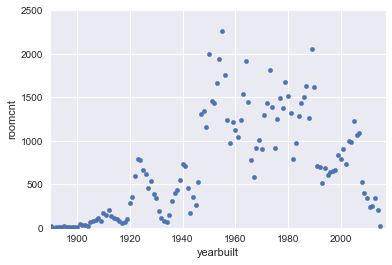

In [35]:
%matplotlib inline
most_number_built.plot(kind='scatter',x='yearbuilt',y='roomcnt',xlim=(1890,2017),ylim=(0,2500))

In [58]:
missing = df.isnull().sum(axis=0).reset_index()
missing.columns = ['name', 'count']
missing = missing.ix[missing['count']>0]
tot=df.shape[0]
missing['ratio']=missing['count'].apply(lambda x:x/tot)
missing = missing.sort_values(by='count')
missing.describe()

C:\Users\AkilP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



,count,ratio
count,47.000000,47.000000
mean,53993.148936,0.598096
std,38173.944886,0.422863
min,1.000000,0.000011
25%,3241.000000,0.035901
50%,72374.000000,0.801706
75%,89092.500000,0.986901
max,90259.000000,0.999823


## Since 75% of the data is below 0.98 we removed all the columns that has ratio greater then 0.986901

In [81]:
missing_columns_removing= missing[(missing['ratio']>0.986901)]
#bedcnt= bedcn[(bedcn['bedroomcnt']>0.5)]

In [82]:
missing_columns_removing

,name,count,ratio
31,pooltypeid10,89114,0.987139
30,poolsizesum,89306,0.989266
11,decktypeid,89617,0.992711
18,finishedsquarefeet6,89854,0.995336
45,typeconstructiontypeid,89976,0.996688
4,architecturalstyletypeid,90014,0.997109
51,fireplaceflag,90053,0.997541
48,yardbuildingsqft26,90180,0.998948
43,storytypeid,90232,0.999524
5,basementsqft,90232,0.999524


In [97]:
df.drop(['pooltypeid10','poolsizesum','decktypeid','finishedsquarefeet6','typeconstructiontypeid','architecturalstyletypeid','fireplaceflag','yardbuildingsqft26','storytypeid','basementsqft','finishedsquarefeet13','buildingclasstypeid'],axis=1, inplace=True)


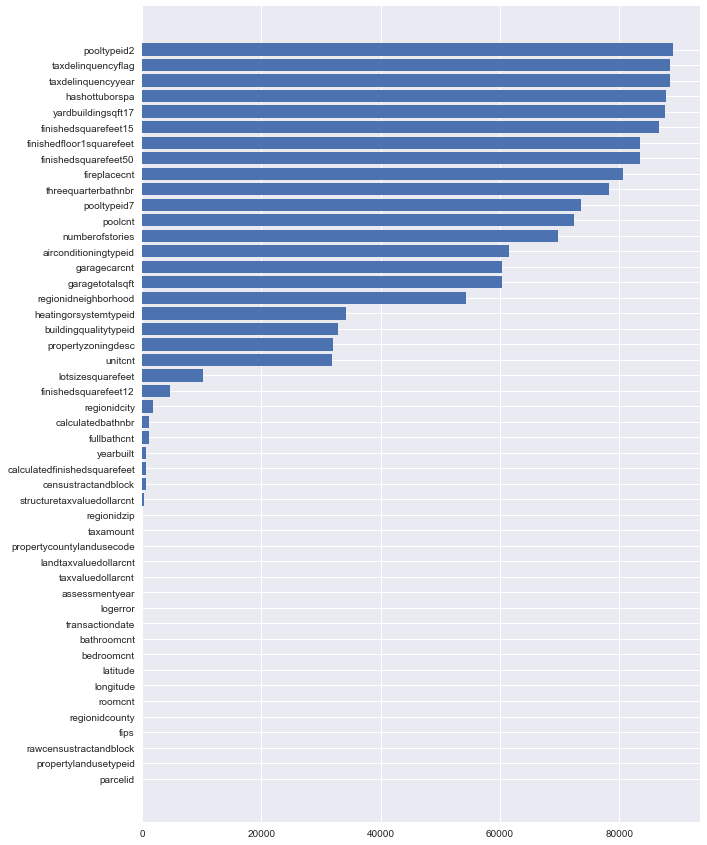

In [100]:
missing_df = pd.DataFrame({'Missing': df.isnull().sum()})
missing_df.sort_values(by="Missing", ascending=True, inplace=True)

a1 = np.arange(missing_df.shape[0])
fig,ax = plt.subplots(figsize=(10,15))
ax.barh(a1, missing_df['Missing'])
ax.set_yticks(a1)
ax.set_yticklabels(missing_df.index)
plt.show()

In [106]:
pooltypeid2= pd.DataFrame(df['pooltypeid2']).reset_index()

In [109]:
pooltypeid2.describe()

,index,pooltypeid2
count,90275.000000,1204.0
mean,45137.000000,1.0
std,26060.292113,0.0
min,0.000000,1.0
25%,22568.500000,1.0
50%,45137.000000,1.0
75%,67705.500000,1.0
max,90274.000000,1.0


## Since all the values i.e the mean max is 1 in place of NaN we can put 1

In [110]:
df['pooltypeid2']= df['pooltypeid2'].fillna(1)

In [111]:
df.to_csv('Clean_Data.csv')

In [74]:
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

NameError: name 'sns' is not defined

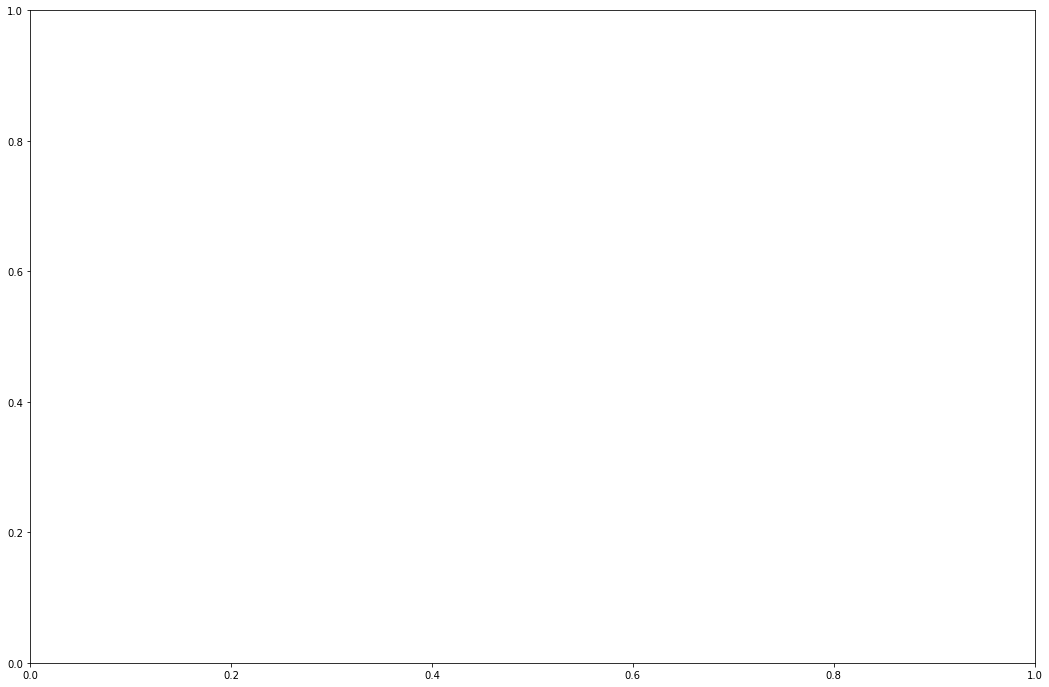

In [75]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(18,12 ))
sns.heatmap(corrmat, vmax=.8, square=True);

In [43]:
x=df.corr()

In [55]:
bedcn= pd.DataFrame(x['bedroomcnt']).reset_index()

In [60]:
bedcn.describe()

,bedroomcnt
count,47.000000
mean,0.200094
std,0.279210
min,-0.319663
25%,0.019212
50%,0.150591
75%,0.368760
max,1.000000


In [62]:
bedcn.head(2)

,index,bedroomcnt
0,parcelid,0.004971
1,logerror,0.025467


In [68]:
bedcnt= bedcn[(bedcn['bedroomcnt']>0.5)]

In [69]:
bedcnt

,index,bedroomcnt
4,basementsqft,0.554301
5,bathroomcnt,0.646120
6,bedroomcnt,1.000000
9,calculatedbathnbr,0.618060
12,calculatedfinishedsquarefeet,0.632035
13,finishedsquarefeet12,0.657599
15,finishedsquarefeet15,0.615172
20,fullbathcnt,0.613753
22,garagetotalsqft,0.591496


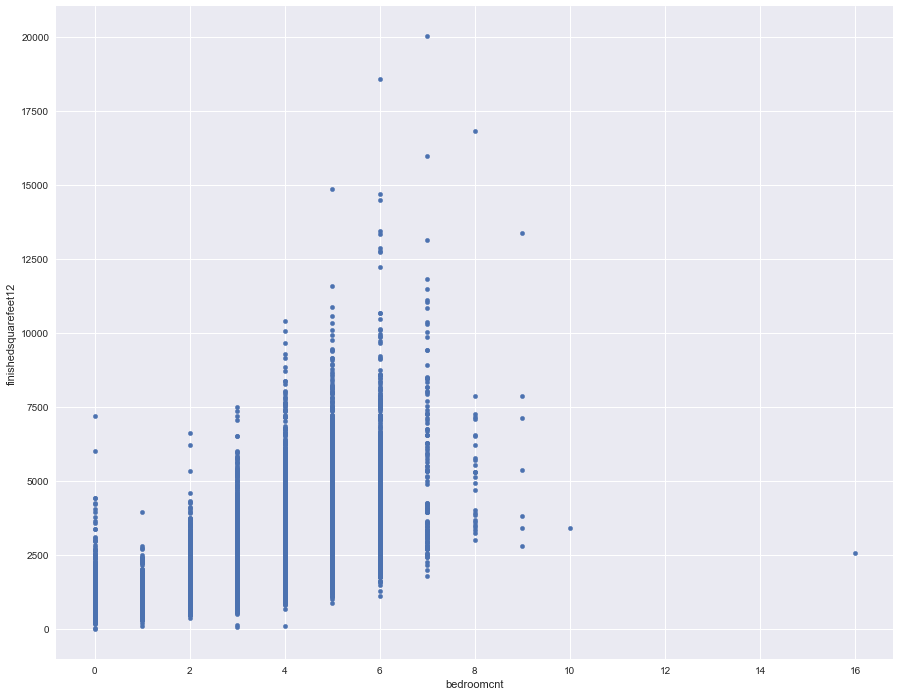

In [71]:
df.plot(kind='scatter',x='bedroomcnt',y='finishedsquarefeet12',figsize=(15,12))

In [85]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x, y, z = df['finishedsquarefeet12']
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

x2, y2, z2 = df['bathroomcnt']
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')


ValueError: too many values to unpack (expected 3)

In [15]:
%matplotlib notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


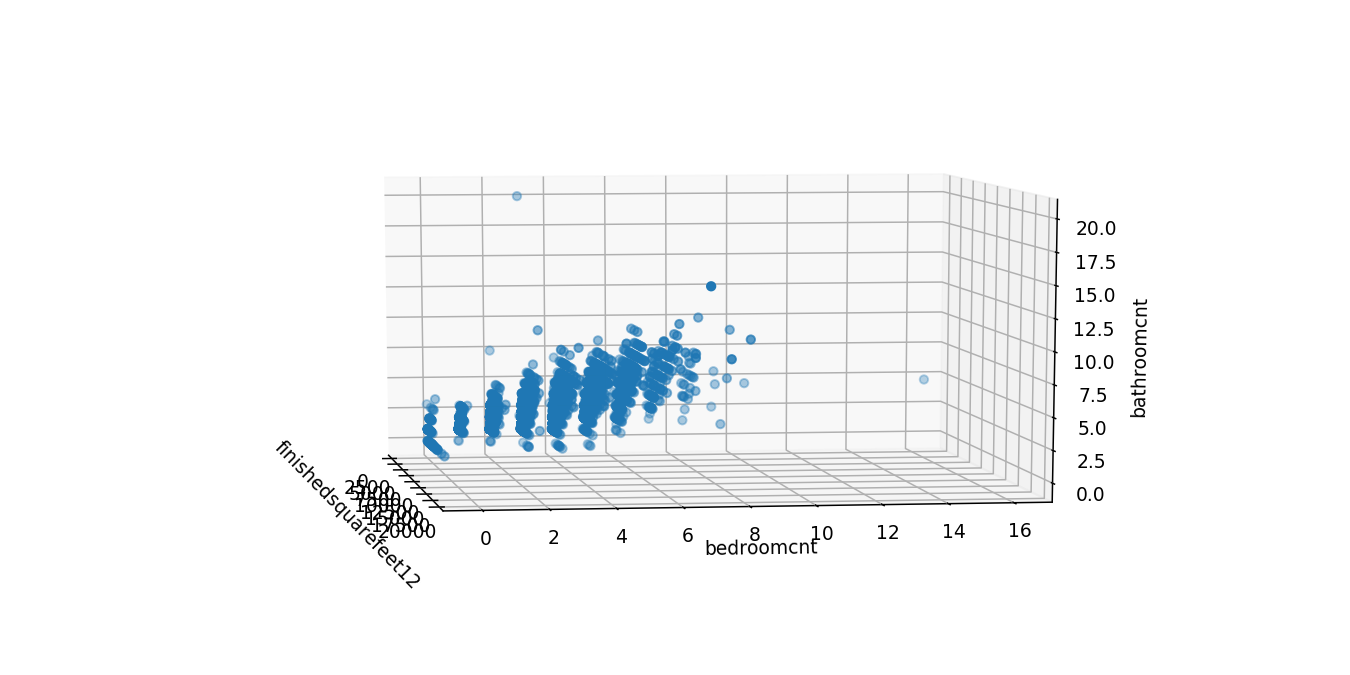

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,5)).gca(projection='3d')
#ax = fig.add_subplot(111, projection='3d')
x =df['finishedsquarefeet12']
y =df['bedroomcnt']
z =df['bathroomcnt']



fig.scatter(x, y, z)

fig.set_xlabel('finishedsquarefeet12')
fig.set_ylabel('bedroomcnt')
fig.set_zlabel('bathroomcnt')


In [50]:
df_bedroomcount=a[pd.isnull(a['bedroomcnt'])]# bedcnt= bedcn[(bedcn['bedroomcnt']>0.5)]

In [53]:
df_bedroomcount

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
148887,79639557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,12366.0,67366.0,2001.0,55000.0,780.54,NaN,NaN,NaN
163732,79639558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,6869.0,43992.0,2001.0,37123.0,541.64,NaN,NaN,NaN
267876,79639565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,98235.0,840698.0,2012.0,742463.0,NaN,NaN,NaN,NaN
1576791,76914853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2157.0,188972.0,2010.0,186815.0,NaN,NaN,NaN,NaN
1829788,76915070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,145000.0,435000.0,2012.0,290000.0,NaN,NaN,NaN,NaN
1993119,76916281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2941.0,273196.0,2004.0,270255.0,NaN,NaN,NaN,NaN
2275356,76915500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7752.0,28347.0,2012.0,20595.0,NaN,NaN,NaN,NaN
2349620,76916105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13196.0,407930.0,2004.0,394734.0,NaN,NaN,NaN,NaN
2379438,76914507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,477161.0,2003.0,477161.0,NaN,NaN,NaN,NaN
2409095,76914109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12987.0,143960.0,2003.0,130973.0,NaN,NaN,NaN,NaN


In [44]:
import numpy as np

<IPython.core.display.Javascript object>


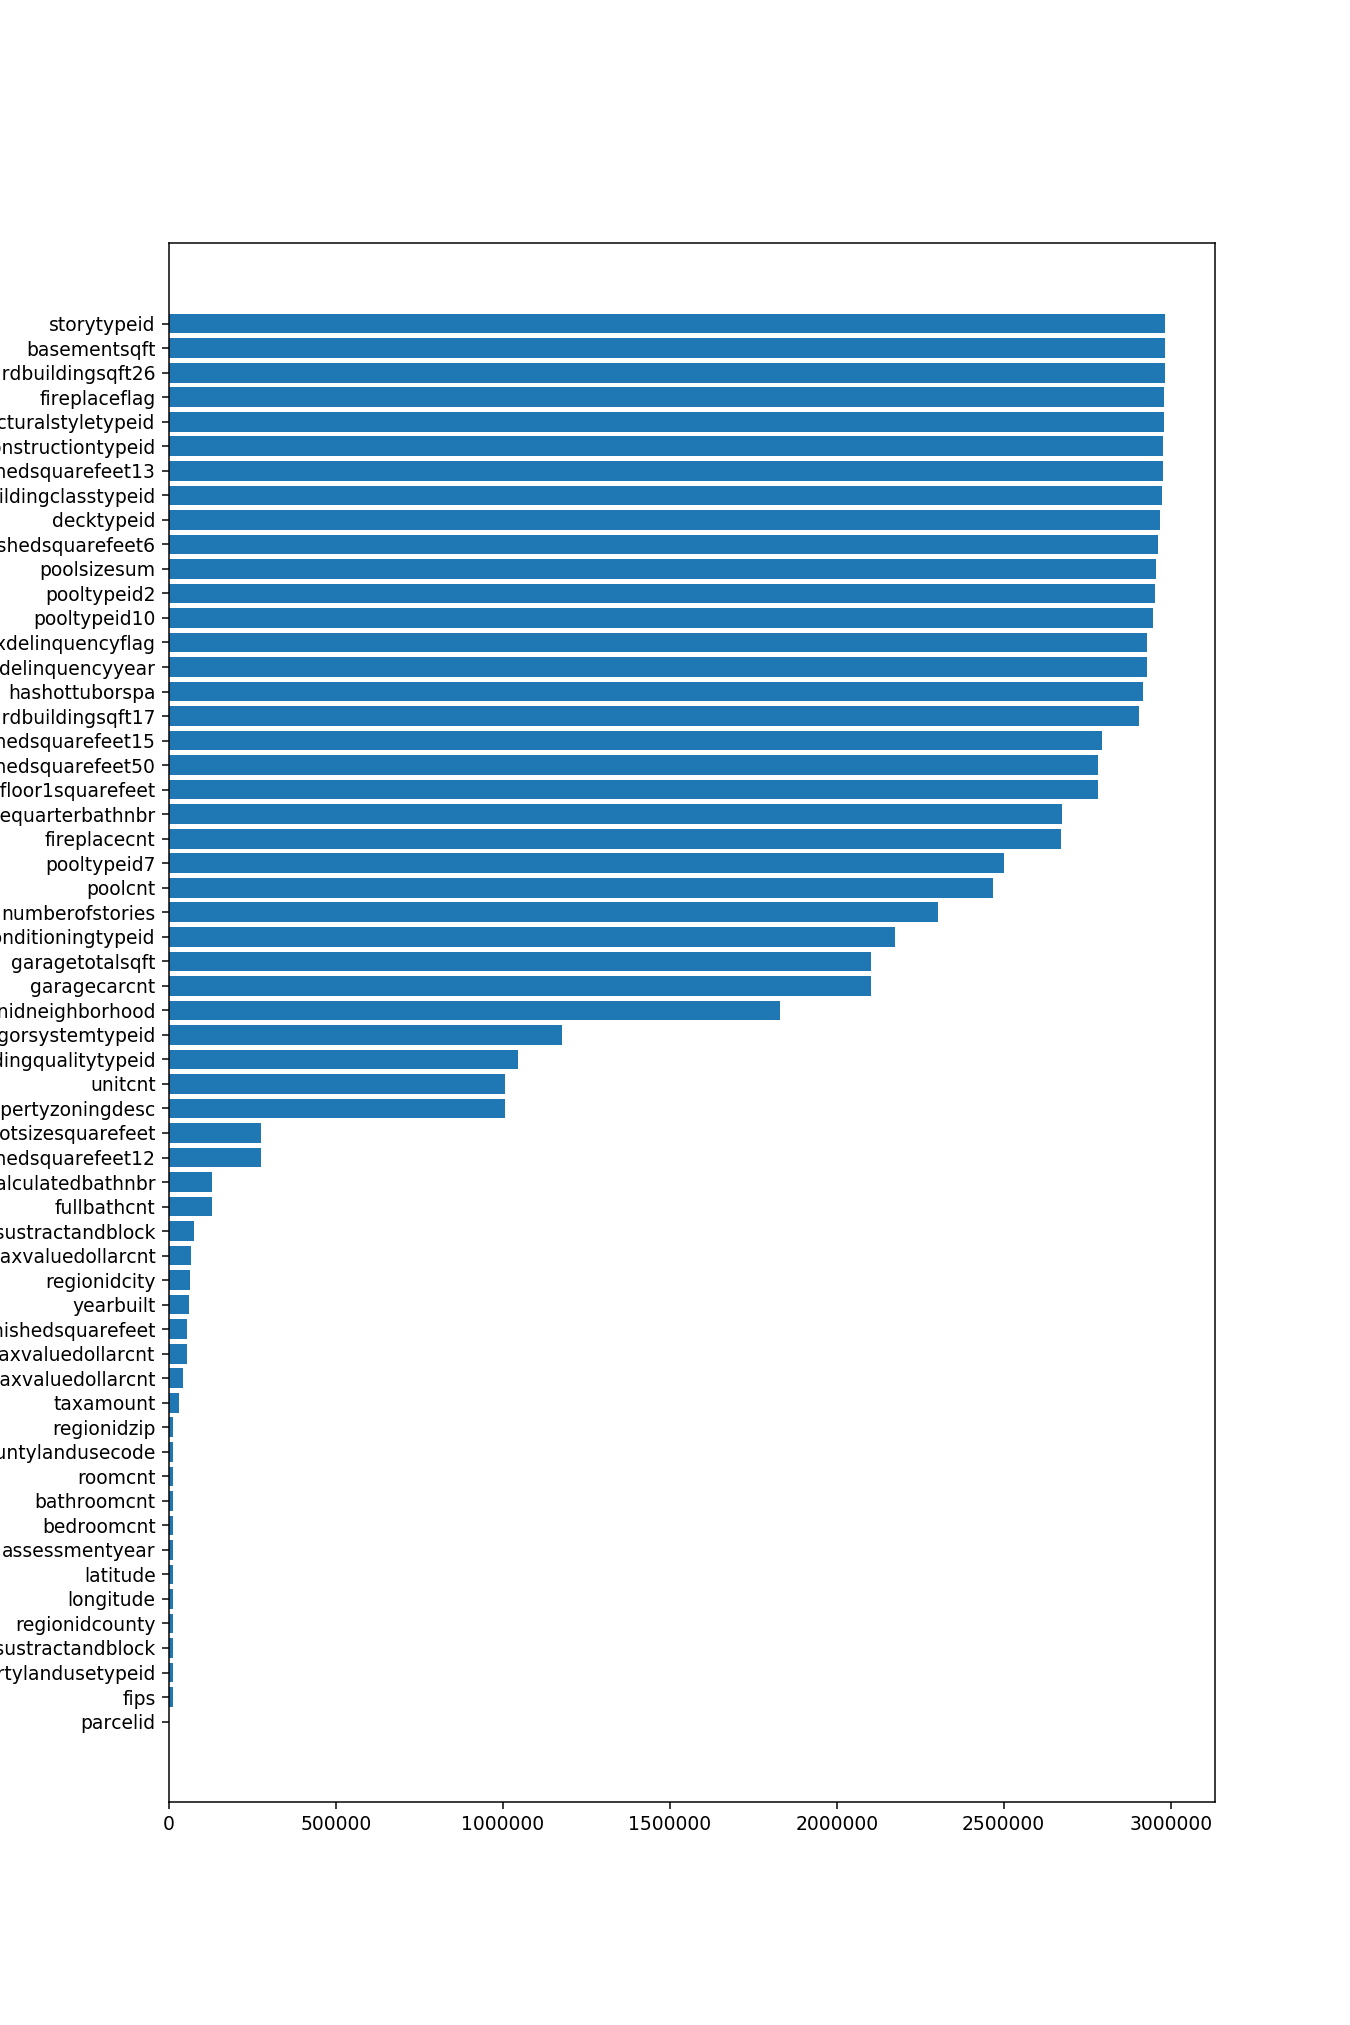

In [45]:
missing_df = pd.DataFrame({'Missing': a.isnull().sum()})
missing_df.sort_values(by="Missing", ascending=True, inplace=True)

a1 = np.arange(missing_df.shape[0])
fig,ax = plt.subplots(figsize=(10,15))
ax.barh(a1, missing_df['Missing'])
ax.set_yticks(a1)
ax.set_yticklabels(missing_df.index)
plt.show()